# Лабораторная работа

# Измерение магнитного поля земли

In [1]:
#Импортирование библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error
from IPython.display import Image 
from scipy.interpolate import interp1d
#%matplotlib inline
def mnkGP(x,y):
    d = 1 # степень полинома
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True) # Модель
    f = sp.poly1d(fp) # аппроксимирующая функция
    y1=[fp[0]*x[i]+fp[1] for i in range(0,len(x))] # значения функции a*x+b
    so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4) # средняя ошибка
    fx = sp.linspace(x[0], x[-1] + 1, len(x)) # можно установить вместо len(x) большее число для интерполяции
    #plt.plot(x, y, 'o', label='Original data', markersize=10)
    #plt.plot(fx, f(fx))
    #plt.grid(True)
    #plt.ylabel('I')
    #plt.xlabel('U')
    #plt.title(f'$I_p$ = {round(fp[1],3)} mA')
    #plt.show()
    return fp[0], fp[1]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


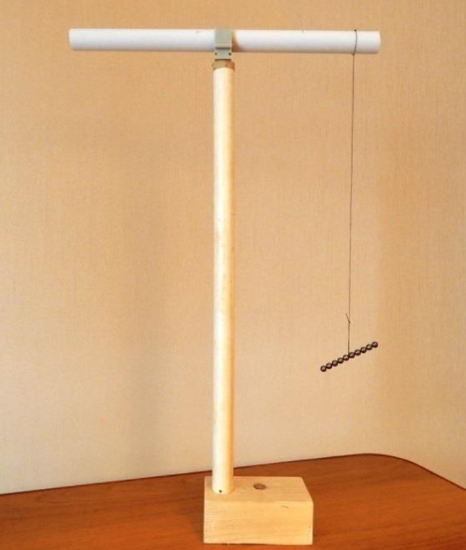

In [2]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/lab3.png')

### Магнитный момент $P_m$ тонкого витка площадью 𝑆 с током 𝐼 равен:

## $\vec{P_m}=\frac{I \vec{S}}{c}$

### Магнитное поле точечного диполя

## $\vec{B}=\frac{3(\vec{P_m} \vec{r})}{r^5}-\frac{\vec{P_m}}{r^3}$

### На точечный магнитный диполь 𝑃𝑚 действует механический момент сил:

## $\vec{M}=\vec{P_m}\times \vec{B}$

### Связь между индукцией магнитного поля на полюсах однородно намагниченного шара с величиной намагниченности и остаточной магнитной индукцией 

### $\vec{B_p}=\frac{8 \pi}{3} \vec{p_m}=\frac{2}{3} \vec{B_r}$

# Определение величины магнитного момента по силе сцепления магнитных шаров

### Сила, действующая на точечный диполь

## $\vec{F}=(\vec{P_m} \vec{\nabla}) \vec{B}$

## Первый способ

In [85]:
d=np.array([6.32,6.30,6.28,6.27,6.33,6.35])
d=d/10
d_average=sum(d)/len(d)
d_average=round(d_average,4)
d_loss=[abs(d[i]-d_average) for i in range(0,len(d))]
#print(d_loss)
d_loss_average=sum(d_loss)/len(d_loss)
#print(d_loss_average)
d_loss_res=(d_loss_average**2+0.001**2)**0.5
print(f"Диаметр шарика d={round(d_average,5)}+-0.00003 cm")
d=0.63
d_d=0.003

Диаметр шарика d=0.6308+-0.00003 cm


In [86]:
r_max=21.4/10+d
print(r_max)
d_r_max=0.5/10+d_d
m=10.215/12
d_m=0.01
M=385.5
d_M=3.85

2.7699999999999996


### Найдем $P_m=\sqrt{\frac{mg r_{max}^4}{6}}$

## $\vec{B_p}=\frac{2\vec{P_m}}{R^3}$

In [91]:
P_m=round((m*980*(r_max)**4/6)**0.5,6)
d_P_m=round(P_m*(0.5*d_m/m+2*d_r_max/r_max),6)
B_p=2*P_m/(d/2)**3
d_B_p=B_p*(3*d_P_m/P_m+3*d_d/d)
print(f"P_m={P_m}+-{d_P_m}")
print(f"B_p={B_p}+-{d_B_p}")



P_m=90.474359+-3.993616
B_p=5789.270593128492+-849.3340111487612


## Второй способ

## $\frac{6P_m^2}{d^4}=\frac{Mg}{1.08}$

## $P_m=\frac{d^2 \sqrt{M g}}{\sqrt{1.08\cdot6}}$

In [90]:
P_m_2=round(d**2*(M*980)**0.5/(1.08*6)**0.5,6)
d_P_m_2=round(P_m_2*(d_M/M+2*d_d/d),7)
B_p_2=2*P_m_2/(d/2)**3
d_B_p_2=B_p_2*(3*d_P_m_2/P_m_2+3*d_d/d)
print(d_P_m_2)
print(f"$P_m$=({P_m_2}+-6*10^(-7))")
print(f"B_p={B_p_2}+-{d_B_p_2}")

1.8697984
$P_m$=(95.833826+-6*10^(-7))
B_p=6132.212008142469+-446.53684193085985
